# ANN Exercises


In particular, in this homework we consider neural networks with multiple layers. Each layer has multiple inputs and outputs, and can be broken down into two parts:
- A **linear module** that implements a linear transformation: $z_{j}=\left(\sum_{i=1}^{m} x_{i} w_{i, j}\right)+w_{0 j}$ specified by a weight matrix $W$ and a bias vector $W_{0}$. The output is $\left[z_{1}, \ldots, z_{n}\right]^{T}$.

- An **activation module** that applies an activation function to the outputs of the linear module for some activation function $f$, such as `Tanh` or `ReLU` in the hidden layers or `Softmax` (see below) at the output layer. We write the output as: : $\left[f\left(z_{1}\right), \ldots, f\left(z_{m}\right)\right]^{T}$, although technically, for some activation functions such as `softmax`, each output will depend on all the $z_{i}$, not just one.

We will use the following notation for quantities in a network:
- Inputs to the network are $x_{1}, \ldots, x_{d}$.
- Number of layers is $L$
- There are $m^{l}$ inputs to layer $l$
- There are $n^{l}=m^{l+1}$ outputs from layer $l$
- The weight matrix for layer $l$ is $W^{l}$, an $m^{l} \times n^{l}$ matrix, and the bias vector (offset) is $W_{0}^{l}$, an $n^{l} \times 1$ vector
- The outputs of the linear module for layer $l$ are known as pre-activation values and denoted $z^{l}$
- The activation function at layer $l$ is $f^{l}(\cdot)$
- Layer $l$ activations are $a^{l}=\left[f^{l}\left(z_{1}^{l}\right), \ldots, f^{l}\left(z_{n^{l}}^{l}\right)\right]^{T}$
- The output of the network is the values $a^{L}=\left[f^{L}\left(z_{1}^{L}\right), \ldots, f^{L}\left(z_{n^{L}}^{L}\right)\right]^{T}$
- Loss function $\operatorname{Loss}(a, y)$ measures the loss of output values $a$ when the target is $y$

## Loss functions and output activations: classification

When doing classification, it's natural to think of the output values as being discrete: $+1$ and $-1$. But it is generally difficult to use optimization-based methods without somehow thinking of the outputs as being continuous (even though you will have to discretize when it's time to make a prediction.

###  Hinge loss, linear activation

When we looked at the SVM objective for classification, we did this:
- Defined the output space to be $\mathbb{R}$
- Developed the hinge loss function
$$
\operatorname{Loss}(a, y)=L_{h}(y a)= \begin{cases}0 & \text { if } y a>1 \\ 1-y a & \text { otherwise }\end{cases}
$$
where $a$ is the continuous output (we're using $a$ here to be consistent with the neural network terminology of activation) and $y$ is the desired/target output

- Tried to find parameters $\theta$ of our model to minimize loss summed over the training data

Consider a single "neuron" with a linear activation function; that is, where $a_{1}^{L}=\sum_{k} w_{k, 1}^{L} x_{k}+w_{0,1}^{L}$. In this case, we have $L=1$ and $f^{L}(z)=z$.

\begin{exercise}
Write a short program to compute the gradient of the loss function with respect to the weight vector (not the bias): $\nabla_{w^{L}} \operatorname{Loss}\left(a_{1}^{L}, y\right)$ when $\operatorname{Loss}(a, y)=L_{h}(y a)$.
- $\mathrm{x}$ is a column vector
- y is a number, a label
- $a$ is a number, an activation
It should return a column vector.

        def hinge_loss_grad (x, y, a):
            pass


\end{exercise}


#### answer:

In [2]:
def hinge_loss_grad (x, y, a): 
    if (y.multiply(a)>1):
        return(0)
    else:
        return(-y*sum(x))
        

## Log loss, sigmoidal activation

Another way to make the output for a classifier continuous is to make it be in the range $(0,1)$, which admits the interpretation of being the predicted probability that the example is positive. A convenient way to make the activation of a unit be in the range $(0,1)$ is to use a sigmoid function:
$$
\sigma(z)=\frac{1}{1+e^{-z}}
$$
The figure below shows a sigmoid activation function on the left, with the rectified linear (ReLU) activation function on the right for comparison.

![](sig_relu_v1.png)

\begin{exercise}
What is an expression for the derivative of the sigmoid with respect to z, expressed as a function of z, its input?
\end{exercise}


#### answer:
$$\frac{d\sigma(z)}{dz}=\frac{d}{dz}\left(\frac{1}{1+e^{-z}}\right)= -(1+e^{-z})^{-2}\cdot(-e^{-z})=\frac{e^{-z}}{(1+e^{-z})^{2}}$$

\begin{exercise}
What is an expression for the derivative of the sigmoid with respect to $z$, but this time expressed as a function of $o=$ $\sigma(z)$, its output?
Hint: Think about the expression $1-\frac{1}{1+e^{-z}}$. (Here https://www.mathsisfun.com/ contains a review of computing derivatives.)

\end{exercise}


#### answer:
$$\frac{d\sigma(z)}{dz}=\frac{e^{-z}}{(1+e^{-z})^{2}}=\frac{e^{-z}+1-1}{(1+e^{-z})^{2}}=\frac{e^{-z}+1}{(1+e^{-z})^{2}}-\frac{1}{(1+e^{-z})^{2}}=\frac{1}{(1+e^{-z})}-\frac{\sigma(z)}{(1+e^{-z})}=\frac{1}{(1+e^{-z})}(1-\sigma(z))=\sigma(z)(1-\sigma(z))$$

## Loss function for predicting probabilities 

We will consider positive points to have label $+1$, and negative points to have label 0 .

We need a loss function that works well when we are predicting probabilities. A good choice is to ask what probability is assigned to the correct label. We will interpret the value outputted by our classifier as the probability that the example is positive. So, if the output value is $a$ and the true label is $+1$, then the probability assigned to the true label is $a$; on the other hand, if the true label is 0 , then the probability assigned to the true label is $1-a$. Because we actually will be interested in the probability of the predictions on the whole data set, we'd want to choose weights to maximize
$$
\prod_{t} P\left(a^{(t)}, y^{(t)}\right)
$$
where $P\left(a^{(t)}, y^{(t)}\right)$ is the probability that the network predicts the correct label for data point $(t)$.
Using a notational trick (which turns an if expression into a product)  we can write the probability $P(a, y)$ as
$$
P(a, y)=a^{y}(1-a)^{(1-y)}
$$

\begin{exercise}

What is the value of  $P(a, y)$  when  $y=0$  and $y=1$?

\end{exercise}


#### answer:

for $\space y=0 , \space P(a, 0)=a^{0}(1-a)^{1}=(1-a)$ 

for $\space y=1 , \space P(a, 1)=a^{1}(1-a)^{0}=a$

\begin{exercise}
Find a simplified expression for $\log P(a, y)$ that does not use exponentiation. Note that we refer to the natural logarithm $\ln$ as $\log$ throughout this assignment.

\end{exercise}


#### answer:
$\log\left( P(a, y)\right) = \log \left(a^{y}(1-a)^{(1-y)}\right)= y\log(a)+(1-y)\log(1-a)$

In fact, because log is a monotonic function, the same weights that maximize the product of the probabilities will minimize the negative log likelihood ("likelihood" is the same as probability; we just use that name here because the phrase is an idiom in machine learning, abbreviated NLL):
$$
\operatorname{Loss}(a, y)=N L L(a, y)=-y \log a-(1-y) \log (1-a) .
$$
Our objective function (over our $n$ data points) will then be
$$
\sum N L L\left(a^{(t)}, y^{(t)}\right)=-\sum_{t=1}^{n}\left[y^{(t)} \log a^{(t)}+\left(1-y^{(t)}\right) \log \left(1-a^{(t)}\right)\right] .
$$
Remember that $a^{(t)}$ is our model's output for training example $t$, and $y^{(t)}$ is the true label (+ 1 or 0 ).
Now, we can think about a single unit with a sigmoidal activation function, trained to minimize NLL. So, $a_{1}^{L}=$ $\sigma\left(\sum_{k} w_{k, 1}^{L} x_{k}+w_{0,1}^{L}\right)$. In this case, we have $L=1$.

\begin{exercise}
Write a formula for the gradient of the NLL with respect to the first weight, $\nabla_{w_{1,1}^{L}} N L L\left(a_{1}^{L}, y\right)$, for a single training example. Hint: consider using the chain rule; the final answer (expression) is very short.

Write an expression of the gradient in terms of $x_1, a_1$, and $y$
\end{exercise}



#### answer: 

$$\nabla_{w_{1,1}^{L}} N L L\left(a_{1}^{L}, y\right)=\nabla_{w_{1,1}^{L}}\left(-y \log a_1-(1-y) \log (1-a_1) \right)= \nabla_{w_{1,1}^{L}}\left(-y \log \sigma\left( w_{1, 1} x_{1}+w_{0,1}\right)-(1-y) \log (1-\sigma\left( w_{1, 1} x_{1}+w_{0,1}\right)) \right)=-y\frac{1}{\sigma\left( w_{1, 1} x_{1}+w_{0,1}\right)}\sigma\left( w_{1, 1} x_{1}+w_{0,1}\right)\left(1-\sigma\left( w_{1, 1} x_{1}+w_{0,1}\right) \right)x_1+(1-y)\frac{1}{\left(1-\sigma\left( w_{1, 1} x_{1}+w_{0,1}\right) \right)})\sigma\left( w_{1, 1} x_{1}+w_{0,1}\right)\left(1-\sigma\left( w_{1, 1} x_{1}+w_{0,1}\right) \right)x_1= -y(1-\sigma\left( w_{1, 1} x_{1}+w_{0,1}\right))x_1+(1-y) \sigma \left( w_{1, 1} x_{1}+w_{0,1}\right)x_1= -y(1-a_1)x_1+(1-y)a_1x_1=x_1(a_1 - y)$$ 

\begin{exercise}
Write a formula for the gradient of the NLL with respect to the full weight vector, $\nabla_{W^{L}} N L L\left(a_{1}^{L}, y\right)$, for a single training example.

\end{exercise}


using matrix notation:  $X(A-Y)$ 

## Multiclass classification

What if we needed to classify homework problems into three categories: enlightening, boring, impossible? We can do this by using a "one-hot" encoding on the output, and using three output units with what is called a "softmax" (SM) activation module. It's not a typical activation module, since it takes in all $n_{L}$ pre-activation values $z_{j}^{L}$ in $\mathbb{R}$ and returns $n_{L}$ output values $a_{j}^{L} \in$ $[0,1]$ such that $\sum_{j} a_{j}^{L}=1$. This can be interpreted as representing a probability distribution over the possible categories.
The individual entries are computed as
$$
a_{j}=\frac{e^{z_{j}}}{\sum_{k=1}^{n^{L}} e^{z_{k}}}
$$
We'll describe the relationship of the vector $a$ on the vector $z$ as
$$
a=\operatorname{SM}(z)
$$
The network below shows a one-layer network with a linear module followed by a softmax activation module.

![](softmax.png)

\begin{exercise}
What probability distribution over the categories is represented by $z^{L}=[-1,0,1]^{T}$ ?
Enter a distribution (a list of three numbers adding up to 1) for the three categories. Your answers should be numeric (please enter numbers, and do not use the symbol $e$ ):

\end{exercise}


#### answer: 

$$ a = [a_{1},a_{2},a_{3}]=[\frac{e^{z_{1}}}{\sum_{k=1}^{3} e^{z_{k}}},\frac{e^{z_{2}}}{\sum_{k=1}^{3} e^{z_{k}}},\frac{e^{z_{3}}}{\sum_{k=1}^{3} e^{z_{k}}}] = [\frac{e^{-1}}{e^{-1}+e^{0}+e^{1}},\frac{e^{0}}{e^{-1}+e^{0}+e^{1}},\frac{e^{1}}{e^{-1}+e^{0}+e^{1}}]=[\frac{0.367}{4.086},\frac{1}{4.086},\frac{2.718}{4.086}] = [0.09,0.66,0.24]$$

Now, we need a loss function $\operatorname{Loss}(a, y)$ where $a$ is a discrete probability distribution and $y$ is a one-hot vector encoding of a single output value. It makes sense to use negative log likelihood as a loss function for the same reasons as before. So, we'll just extend our definition of NLL from earlier:
$$
N L L(a, y)=-\sum_{j=1}^{n^{L}} y_{j} \ln a_{j}^{L}
$$
Note that the above expression is for multi-classes (number of class $>2$ ). For two-classes, the expression reduce to what you have seen before.

\begin{exercise}
If $a=[.3, .5, .2]^{T}$ and $y=[0,0,1]^{T}$, what is $N L L(a, y)$ ?
Enter an expression involving `log(.)` (for natural log) and constants.

\end{exercise}


#### answer: 
$$
N L L([.3, .5, .2],[0,0,1])=-\sum_{j=1}^{3} y_{j} \ln a_{j}= -(0\cdot \ln(0.3) + 0\cdot \ln(0.5)+ 1\cdot \ln(0.2)= \ln(0.2)
$$

Now, we can think about a single layer with a softmax activation module, trained to minimize NLL. The pre-activation values (the output of the linear module) are:
$$
z_{j}^{L}=\sum_{k} w_{k, j}^{L} x_{k}+w_{0, j}^{L}
$$
and $a^{L}=S M\left(z^{L}\right)$
To do gradient descent, we need to know $\frac{\partial}{\partial w_{k, j}^{L}} N L L\left(a^{L}, y\right)$. We'll reveal the secret (that you might guess from Problem 1 ) that it has an awesome form! (Please consider deriving this, for fun and satisfaction!)
$$
\frac{\partial}{\partial w_{k, j}^{L}} N L L\left(a^{L}, y\right)=x_{k}\left(a_{j}^{L}-y_{j}\right)
$$
And of course, it's easy to compute the whole matrix of these derivatives, $\nabla_{W^{L}} N L L\left(a^{L}, y\right)$, in one quick matrix computation.
2.C) Suppose we have two input units and three possible output values, and the weight matrix $W^{L}$ is
$$
W^{L}=\left[\begin{array}{ccc}
1 & -1 & -2 \\
-1 & 2 & 1
\end{array}\right]
$$
or in Python form: 
    
        w = np.array([[1, -1, -2], [-1, 2, 1]])


Assume the biases are zero, the input $x=[1,1]^{T}$ (e.g., `x = np.array([[1, 1]]).T`, and the target output $y=[0,1,0]^{T}$ (e.g., `y = np.array([[0, 1, 0]]).T`). 


\begin{exercise}
What is the matrix $\nabla_{W^{L}} N L L\left(a^{L}, y\right)$ ? Hint: You might want to solve using Python and numpy.
Enter the matrix as a list of lists, one list for each row of the matrix. Please enter values with a precision of three decimal points.
\end{exercise}



#### answer:

In [3]:
import numpy as np 

def softmax(x):
    e_x = np.exp(x)
    return (np.around(e_x / e_x.sum(),3))

w = np.array([[1, -1, -2], [-1, 2, 1]])
x = np.array([[1, 1]]).T
y = np.array([[0, 1, 0]])

z = np.dot(w.T,x).T
print(z)
a=softmax(z)
print(a)
NLL=np.dot(x,(a-y))
NLL


[[ 0  1 -1]]
[[0.245 0.665 0.09 ]]


array([[ 0.245, -0.335,  0.09 ],
       [ 0.245, -0.335,  0.09 ]])

\begin{exercise}
What is the predicted probability that xx is in class 1, before any gradient updates? (Assume we have classes 0, 1, and 2.). Enter a number and justify your answer.


\end{exercise}


#### answer:

vector 'a' describes the predicted probability of x belonging to each class. For x in class 1 the probability is 0.665 (most probable).

\begin{exercise}
Using step size $0.5$, what is $W^{L}$ after one gradient update step?
Enter the matrix as a list of lists, one list for each row of the matrix. Please enter values with a precision of three decimal points.

\end{exercise}


#### answer:

In [4]:
Wnew=w-0.5*NLL
print(Wnew)

[[ 0.8775 -0.8325 -2.045 ]
 [-1.1225  2.1675  0.955 ]]


\begin{exercise}
What is the predicted probability that x is in class 1, given the new weight matrix?

Enter a number and justify your answer.


\end{exercise}


#### answer:

In [5]:
z = np.dot(Wnew.T,x).T
print(z)
a=softmax(z)
print(a)

[[-0.245  1.335 -1.09 ]]
[[0.159 0.773 0.068]]


given the new weight matrix, the probability of x being class 1 is now 0.773

## Neural Networks
In this problem we will analyze a simple neural network to understand its classification properties. 

Consider the neural network given in the figure below, with ReLU activation functions ( $f^{1}$ in the figure) on all hidden neurons, and softmax activation ( $f^{2}$ in the figure) for the output layer, resulting in softmax outputs ( $a_{1}^{2}$ and $a_{2}^{2}$ in the figure).

![](nnet.png)

Given an input $x=\left[x_{1}, x_{2}\right]^{T}$, the hidden units in the network are activated in stages as described by the following equations:
$$
\begin{array}{cl}
z_{1}^{1}=x_{1} w_{1,1}^{1}+x_{2} w_{2,1}^{1}+w_{0,1}^{1} & a_{1}^{1}=\max \left\{z_{1}^{1}, 0\right\} \\
z_{2}^{1}=x_{1} w_{1,2}^{1}+x_{2} w_{2,2}^{1}+w_{0,2}^{1} & a_{2}^{1}=\max \left\{z_{2}^{1}, 0\right\} \\
z_{3}^{1}=x_{1} w_{1,3}^{1}+x_{2} w_{2,3}^{1}+w_{0,3}^{1} & a_{3}^{1}=\max \left\{z_{3}^{1}, 0\right\} \\
z_{4}^{1}=x_{1} w_{1,4}^{1}+x_{2} w_{2,4}^{1}+w_{0,4}^{1} & a_{4}^{1}=\max \left\{z_{4}^{1}, 0\right\} \\
& \\
z_{1}^{2}=a_{1}^{1} w_{1,1}^{2}+a_{2}^{1} w_{2,1}^{2}+a_{3}^{1} w_{3,1}^{2}+a_{4}^{1} w_{4,1}^{2}+w_{0,1}^{2} \\
z_{2}^{2}=a_{1}^{1} w_{1,2}^{2}+a_{2}^{1} w_{2,2}^{2}+a_{3}^{1} w_{3,2}^{2}+a_{4}^{1} w_{4,2}^{2}+w_{0,2}^{2}
\end{array}
$$

The final output of the network is obtained by applying the softmax function to the last hidden layer,
$$
\begin{aligned}
a_{1}^{2} &=\frac{e^{z_{1}^{2}}}{e^{z_{1}^{2}}+e^{z_{2}^{2}}} \\
a_{2}^{2} &=\frac{e^{z_{2}^{2}}}{e^{z_{1}^{2}}+e^{z_{2}^{2}}} .
\end{aligned}
$$
In this problem, we will consider the following setting of parameters:
$$
\begin{gathered}
{\left[\begin{array}{cccc}
w_{1,1}^{1} & w_{1,2}^{1} & w_{1,3}^{1} & w_{1,4}^{1} \\
w_{2,1}^{1} & w_{2,2}^{1} & w_{2,3}^{1} & w_{2,4}^{1}
\end{array}\right]=\left[\begin{array}{cccc}
1 & 0 & -1 & 0 \\
0 & 1 & 0 & -1
\end{array}\right], \quad\left[\begin{array}{c}
w_{0,1}^{1} \\
w_{0,2}^{1} \\
w_{0,3}^{1} \\
w_{0,4}^{1}
\end{array}\right]=\left[\begin{array}{c}
-1 \\
-1 \\
-1 \\
-1
\end{array}\right],} \\
{\left[\begin{array}{ll}
w_{1,1}^{2} & w_{1,2}^{2} \\
w_{2,1}^{2} & w_{2,2}^{2} \\
w_{3,1}^{2} & w_{3,2}^{2} \\
w_{4,1}^{2} & w_{4,2}^{2}
\end{array}\right]=\left[\begin{array}{cc}
1 & -1 \\
1 & -1 \\
1 & -1 \\
1 & -1
\end{array}\right], \quad\left[\begin{array}{c}
w_{0,1}^{2} \\
w_{0,2}^{2}
\end{array}\right]=\left[\begin{array}{l}
0 \\
2
\end{array}\right]}
\end{gathered}
$$

\begin{exercise}

Consider the input $x_{1}=3, x_{2}=14$.
What are the outputs of the hidden units, $\left(f^{1}\left(z_{1}^{1}\right), f^{1}\left(z_{2}^{1}\right), f^{1}\left(z_{3}^{1}\right), f^{1}\left(z_{4}^{1}\right)\right)$.
Enter a Python list of 4 numbers.

\end{exercise}




#### answer:

In [28]:
def softmax(x):
    e_x = np.exp(x)
    return (np.around(e_x / e_x.sum(),3))

def relu(a):
    return np.maximum(0, a)

w1= np.array([[1, 0, -1, 0], [0, 1, 0, -1]])
b1=np.array([[-1], [-1], [-1], [-1]])
w2=np.array([[1, -1],[1, -1],[1, -1],[1, -1]])
b2=np.array([[0], [2]])
x = np.array([[3, 14]]).T
#print(w1)
#print(b1)
#print(w2)
#print(b2)
z1 = (np.dot(w1.T,x)+b1).T
print(z1)
a1=relu(z1)
print('answer:',a1)

[[  2  13  -4 -15]]
answer: [[ 2 13  0  0]]


\begin{exercise}
What is the final output $\left(a_{1}^{2}, a_{2}^{2}\right)$ of the network? Enter a Python list of 2 numbers.

\end{exercise}


#### answer: 

In [29]:
z2 = (np.dot(w2.T,a1.T)+b2).T
print(z2)
a2=softmax(z2)
print('answer:',a2)

[[ 15 -13]]
answer: [[1. 0.]]


## Unit decision boundaries
Let's characterize the decision boundaries in $x$-space, corresponding to the four hidden units. These are the regions where the input to the units $z_{1}^{1}, z_{2}^{1}, z_{3}^{1}, z_{4}^{1}$ are exactly zero.

Hint: You should describe a diagram of the decision boundaries for each unit in the $x$-space and label the sides of the boundaries with 0 and $+$ to indicate whether the unit's output would be exactly 0 or positive, respectively. (The diagram should be a 2D plot with $x_{1}$ and $x_{2}$ on each axis, with lines for $z_{1}^{1}=0, z_{2}^{1}=0, z_{3}^{1}=0, z_{4}^{1}=0$.)

\begin{exercise}
What is the shape of the decision boundary for a single unit?
\end{exercise}



#### answer:

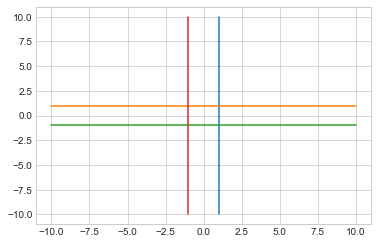

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot([1, 1],[-10, 10])
plt.plot([-10, 10],[1, 1])
plt.plot([-10, 10],[-1, -1])
plt.plot([-1, -1],[-10, 10])
plt.show()


\begin{example}
Consider the following input vectors: $x^{(1)}=[0.5,0.5]^{T}, x^{(2)}=[0,2]^{T}, x^{(3)}=[-3,0.5]^{T}$. Enter a matrix where each column represents the outputs of the hidden units $\left(f\left(z_{1}^{1}\right), \ldots, f\left(z_{4}^{1}\right)\right)$ for each of the input vectors. You can use your diagram of decision boundaries.
Enter a Python list of lists where each list is a row of the matrix.

\end{example}


In [44]:
w1= np.array([[1, 0, -1, 0], [0, 1, 0, -1]])
b1=np.array([[-1], [-1], [-1], [-1]])
x = [np.array([[0.5, 0.5]]).T,np.array([[0, 2]]).T,np.array([[-3, 0.5]]).T]
result =np.array([[]])
for i,xi in enumerate(x):
    #print(w1)
    #print(b1)
    #print(w2)
    #print(b2)
    z1 = (np.dot(w1.T,xi)+b1).T
    print(z1)
    a1=relu(z1)
    print(a1)
    if(i==0):
        result=a1
    else:
        result = np.vstack([result, a1])     
        
result

[[-0.5 -0.5 -1.5 -1.5]]
[[0. 0. 0. 0.]]
[[-1  1 -1 -3]]
[[0 1 0 0]]
[[-4.  -0.5  2.  -1.5]]
[[0. 0. 2. 0.]]


array([[0., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 2., 0.]])

## Network outputs

In our network above, the output layer with two softmax units is used to classify into one of two classes. For class 1 , the first unit's output should be larger than the other unit's output, and for class 2, the second unit's output should be larger. This generalizes nicely to $k$ classes by using $k$ output units.


Let's characterize the region in $x$-space where this network's output indicates the first class (that is, $a_{1}^{2}$ is larger) or indicates the second class (that is, $a_{2}^{2}$ is larger). Your diagram from the previous part will be useful here.





What is the output value of the neural network in each of the following cases? Write your answer for $a_{i}^{2}$ as expressions, you can use powers of $e$, for example, $e^{* *} 2+1$; the exponents can be negative, $e^{* *}(-2)+1$.

**Case 1) For $f\left(z_{1}^{1}\right)+f\left(z_{2}^{1}\right)+f\left(z_{3}^{1}\right)+f\left(z_{4}^{1}\right)=0$**

\begin{exercise}

$a_{1}^{2}= \frac{e^{z_{1}^{2}}}{e^{z_{1}^{2}}+e^{z_{2}^{2}}} = \frac{e^{a_{1}^{1} w_{1,1}^{2}+a_{2}^{1} w_{2,1}^{2}+a_{3}^{1} w_{3,1}^{2}+a_{4}^{1} w_{4,1}^{2}+w_{0,1}^{2}}}{e^{a_{1}^{1} w_{1,1}^{2}+a_{2}^{1} w_{2,1}^{2}+a_{3}^{1} w_{3,1}^{2}+a_{4}^{1} w_{4,1}^{2}+w_{0,1}^{2}}+e^{a_{1}^{1} w_{1,2}^{2}+a_{2}^{1} w_{2,2}^{2}+a_{3}^{1} w_{3,2}^{2}+a_{4}^{1} w_{4,2}^{2}+w_{0,2}^{2}}} = 
\frac{e^{f\left(z_{1}^{1}\right)\cdot 1 +f\left(z_{2}^{1}\right) \cdot 1 +f\left(z_{3}^{1}\right)\cdot 1+f\left(z_{4}^{1}\right)\cdot 1}}{e^{f\left(z_{1}^{1}\right)\cdot 1+f\left(z_{2}^{1}\right)\cdot 1+f\left(z_{3}^{1}\right)\cdot 1+f\left(z_{4}^{1}\right)\cdot 1}+e^{f\left(z_{1}^{1}\right)\cdot (-1)+f\left(z_{2}^{1}\right)\cdot (-1)+f\left(z_{3}^{1}\right)\cdot (-1)+f\left(z_{1}^{1}\right)\cdot (-1)+2}} = \frac{1}{e^{2}+1} $

$a_{2}^{2}= \frac{e^{z_{2}^{2}}}{e^{z_{1}^{2}}+e^{z_{2}^{2}}} = \frac{e^{a_{1}^{1} w_{1,2}^{2}+a_{2}^{1} w_{2,2}^{2}+a_{3}^{1} w_{3,2}^{2}+a_{4}^{1} w_{4,2}^{2}+w_{0,2}^{2}}}{e^{a_{1}^{1} w_{1,1}^{2}+a_{2}^{1} w_{2,1}^{2}+a_{3}^{1} w_{3,1}^{2}+a_{4}^{1} w_{4,1}^{2}+w_{0,1}^{2}}+e^{a_{1}^{1} w_{1,2}^{2}+a_{2}^{1} w_{2,2}^{2}+a_{3}^{1} w_{3,2}^{2}+a_{4}^{1} w_{4,2}^{2}+w_{0,2}^{2}}} = \frac{e^{f\left(z_{1}^{1}\right)\cdot (-1)+f\left(z_{2}^{1}\right)\cdot (-1)+f\left(z_{3}^{1}\right)\cdot (-1)+f\left(z_{1}^{1}\right)\cdot (-1)+2}}{e^{f\left(z_{1}^{1}\right)\cdot 1+f\left(z_{2}^{1}\right)\cdot 1+f\left(z_{3}^{1}\right)\cdot 1+f\left(z_{4}^{1}\right)\cdot 1}+e^{f\left(z_{1}^{1}\right)\cdot (-1)+f\left(z_{2}^{1}\right)\cdot (-1)+f\left(z_{3}^{1}\right)\cdot (-1)+f\left(z_{1}^{1}\right)\cdot (-1)+2}} = \frac{e^{2}}{e^{2}+1} $

Which class is predicted?


class 2 is predicted

\end{exercise}

**Case 2) For $f\left(z_{1}^{1}\right)+f\left(z_{2}^{1}\right)+f\left(z_{3}^{1}\right)+f\left(z_{4}^{1}\right)=1$**

\begin{exercise}

$a_{1}^{2}= \frac{e^{z_{1}^{2}}}{e^{z_{1}^{2}}+e^{z_{2}^{2}}} = \frac{e^{a_{1}^{1} w_{1,1}^{2}+a_{2}^{1} w_{2,1}^{2}+a_{3}^{1} w_{3,1}^{2}+a_{4}^{1} w_{4,1}^{2}+w_{0,1}^{2}}}{e^{a_{1}^{1} w_{1,1}^{2}+a_{2}^{1} w_{2,1}^{2}+a_{3}^{1} w_{3,1}^{2}+a_{4}^{1} w_{4,1}^{2}+w_{0,1}^{2}}+e^{a_{1}^{1} w_{1,2}^{2}+a_{2}^{1} w_{2,2}^{2}+a_{3}^{1} w_{3,2}^{2}+a_{4}^{1} w_{4,2}^{2}+w_{0,2}^{2}}} = 
\frac{e^{f\left(z_{1}^{1}\right)\cdot 1 +f\left(z_{2}^{1}\right) \cdot 1 +f\left(z_{3}^{1}\right)\cdot 1+f\left(z_{4}^{1}\right)\cdot 1}}{e^{f\left(z_{1}^{1}\right)\cdot 1+f\left(z_{2}^{1}\right)\cdot 1+f\left(z_{3}^{1}\right)\cdot 1+f\left(z_{4}^{1}\right)\cdot 1}+e^{f\left(z_{1}^{1}\right)\cdot (-1)+f\left(z_{2}^{1}\right)\cdot (-1)+f\left(z_{3}^{1}\right)\cdot (-1)+f\left(z_{1}^{1}\right)\cdot (-1)+2}} = \frac{e}{e+e}=\frac{1}{2}  $

$a_{2}^{2}= \frac{e^{z_{2}^{2}}}{e^{z_{1}^{2}}+e^{z_{2}^{2}}} = \frac{e^{a_{1}^{1} w_{1,2}^{2}+a_{2}^{1} w_{2,2}^{2}+a_{3}^{1} w_{3,2}^{2}+a_{4}^{1} w_{4,2}^{2}+w_{0,2}^{2}}}{e^{a_{1}^{1} w_{1,1}^{2}+a_{2}^{1} w_{2,1}^{2}+a_{3}^{1} w_{3,1}^{2}+a_{4}^{1} w_{4,1}^{2}+w_{0,1}^{2}}+e^{a_{1}^{1} w_{1,2}^{2}+a_{2}^{1} w_{2,2}^{2}+a_{3}^{1} w_{3,2}^{2}+a_{4}^{1} w_{4,2}^{2}+w_{0,2}^{2}}} = \frac{e^{f\left(z_{1}^{1}\right)\cdot (-1)+f\left(z_{2}^{1}\right)\cdot (-1)+f\left(z_{3}^{1}\right)\cdot (-1)+f\left(z_{1}^{1}\right)\cdot (-1)+2}}{e^{f\left(z_{1}^{1}\right)\cdot 1+f\left(z_{2}^{1}\right)\cdot 1+f\left(z_{3}^{1}\right)\cdot 1+f\left(z_{4}^{1}\right)\cdot 1}+e^{f\left(z_{1}^{1}\right)\cdot (-1)+f\left(z_{2}^{1}\right)\cdot (-1)+f\left(z_{3}^{1}\right)\cdot (-1)+f\left(z_{1}^{1}\right)\cdot (-1)+2}} = \frac{e}{e+e}=\frac{1}{2} $

Which class is predicted?

depends on the criteria. Class is ambiguous.

\end{exercise}

**Case 3) For $f\left(z_{1}^{1}\right)+f\left(z_{2}^{1}\right)+f\left(z_{3}^{1}\right)+f\left(z_{4}^{1}\right)=3$**

\begin{exercise}

$a_{1}^{2}= \frac{e^{z_{1}^{2}}}{e^{z_{1}^{2}}+e^{z_{2}^{2}}} = \frac{e^{a_{1}^{1} w_{1,1}^{2}+a_{2}^{1} w_{2,1}^{2}+a_{3}^{1} w_{3,1}^{2}+a_{4}^{1} w_{4,1}^{2}+w_{0,1}^{2}}}{e^{a_{1}^{1} w_{1,1}^{2}+a_{2}^{1} w_{2,1}^{2}+a_{3}^{1} w_{3,1}^{2}+a_{4}^{1} w_{4,1}^{2}+w_{0,1}^{2}}+e^{a_{1}^{1} w_{1,2}^{2}+a_{2}^{1} w_{2,2}^{2}+a_{3}^{1} w_{3,2}^{2}+a_{4}^{1} w_{4,2}^{2}+w_{0,2}^{2}}} = 
\frac{e^{f\left(z_{1}^{1}\right)\cdot 1 +f\left(z_{2}^{1}\right) \cdot 1 +f\left(z_{3}^{1}\right)\cdot 1+f\left(z_{4}^{1}\right)\cdot 1}}{e^{f\left(z_{1}^{1}\right)\cdot 1+f\left(z_{2}^{1}\right)\cdot 1+f\left(z_{3}^{1}\right)\cdot 1+f\left(z_{4}^{1}\right)\cdot 1}+e^{f\left(z_{1}^{1}\right)\cdot (-1)+f\left(z_{2}^{1}\right)\cdot (-1)+f\left(z_{3}^{1}\right)\cdot (-1)+f\left(z_{1}^{1}\right)\cdot (-1)+2}} = \frac{e^{3}}{e^{3}+e^{-1}}  $

$a_{2}^{2}= \frac{e^{z_{2}^{2}}}{e^{z_{1}^{2}}+e^{z_{2}^{2}}} = \frac{e^{a_{1}^{1} w_{1,2}^{2}+a_{2}^{1} w_{2,2}^{2}+a_{3}^{1} w_{3,2}^{2}+a_{4}^{1} w_{4,2}^{2}+w_{0,2}^{2}}}{e^{a_{1}^{1} w_{1,1}^{2}+a_{2}^{1} w_{2,1}^{2}+a_{3}^{1} w_{3,1}^{2}+a_{4}^{1} w_{4,1}^{2}+w_{0,1}^{2}}+e^{a_{1}^{1} w_{1,2}^{2}+a_{2}^{1} w_{2,2}^{2}+a_{3}^{1} w_{3,2}^{2}+a_{4}^{1} w_{4,2}^{2}+w_{0,2}^{2}}} = \frac{e^{f\left(z_{1}^{1}\right)\cdot (-1)+f\left(z_{2}^{1}\right)\cdot (-1)+f\left(z_{3}^{1}\right)\cdot (-1)+f\left(z_{1}^{1}\right)\cdot (-1)+2}}{e^{f\left(z_{1}^{1}\right)\cdot 1+f\left(z_{2}^{1}\right)\cdot 1+f\left(z_{3}^{1}\right)\cdot 1+f\left(z_{4}^{1}\right)\cdot 1}+e^{f\left(z_{1}^{1}\right)\cdot (-1)+f\left(z_{2}^{1}\right)\cdot (-1)+f\left(z_{3}^{1}\right)\cdot (-1)+f\left(z_{1}^{1}\right)\cdot (-1)+2}} = \frac{e^{-1}}{e^{3}+e^{-1}} $

Which class is predicted?

class 1 is predicted.

\end{exercise}

